In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# 1. Імпортуємо всі необхідні бібліотеки для роботи та іпортуємо дані. Ознайомлюємось з ними.<br>
We import all necessary libraries for work and import data. Let's get acquainted with them

In [2]:
df = pd.read_excel("C://Users//ya7nita//Downloads//Grocery Database.xlsx")

In [3]:
display(df)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


In [8]:
df.columns

Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')

In [5]:
df.Gender.value_counts(normalize=True)

Female    0.829028
Male      0.170972
Name: Gender, dtype: float64

 Бачимо що набагато більше жінок ніж чоловіків в базі даних<br>
 We see that there are many more women than men in the database

Давайте змінимо формат часу<br>
Let's change the time format

In [15]:
def convert_to_24h(time_str):
    parts = time_str.split(':')
    hour = int(parts[0])
    minutes = int(parts[1])
    if 'PM' in time_str:
        hour += 12
    return f'{hour:02d}:{minutes:02d}:{parts[2][:2]}' 

df['Time'] = df['Time'].apply(lambda x: convert_to_24h(x))
print(df)

      Receipt Number       Date  Year  Month      Time  Mobile Number  \
0           GIJ00001 2016-01-02  2016      1  10:08:03     9793548581   
1           GIJ00002 2016-01-02  2016      1  15:46:50     9938441276   
2           GIJ00003 2016-01-02  2016      1  11:28:52     9976742552   
3           GIJ00003 2016-01-02  2016      1  11:28:52     9976742552   
4           GIJ00003 2016-01-02  2016      1  11:28:52     9976742552   
...              ...        ...   ...    ...       ...            ...   
50442       GSW01533 2019-12-28  2019     12  20:59:27     9893317658   
50443       GSW01534 2019-12-29  2019     12  13:14:45     9809301701   
50444       GSW01535 2019-12-30  2019     12  10:01:32     9840124138   
50445       GSW01535 2019-12-30  2019     12  10:01:32     9840124138   
50446       GSW01535 2019-12-30  2019     12  10:01:32     9840124138   

      Membership ID  Loyalty Card Points  Age  Gender  ...   GST  \
0         MIDID0001                    1   36    Male  

# 2. Хто більше купує у сумі?<br>
Who buys more in sum?

In [7]:
pivot = df.groupby('Gender')["Amount"].sum().sort_values(ascending=False).reset_index()
pivot 

,Gender,Amount
0,Female,469203.7102
1,Male,94186.4668


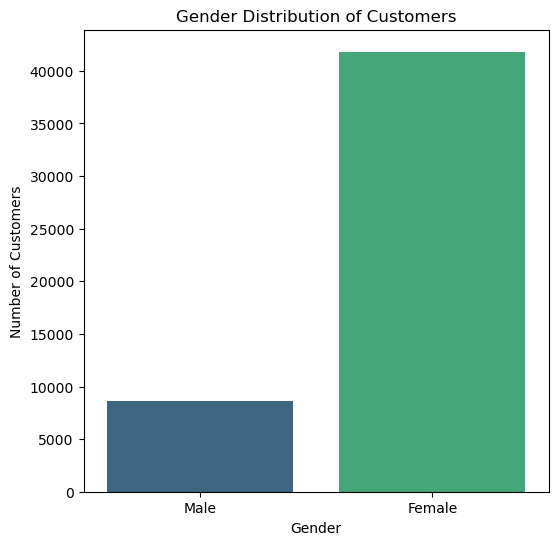

In [12]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

Висновок: набагато більше купують жінки ніж чоловіки. Тому треба придати їм більшу увагу.<br>
Conclusion: women buy much more than men. Therefore, it is necessary to pay more attention to them.

# 3. Скільки наш місячний дохід з продажів?<br>
How much is our monthly sales revenue?

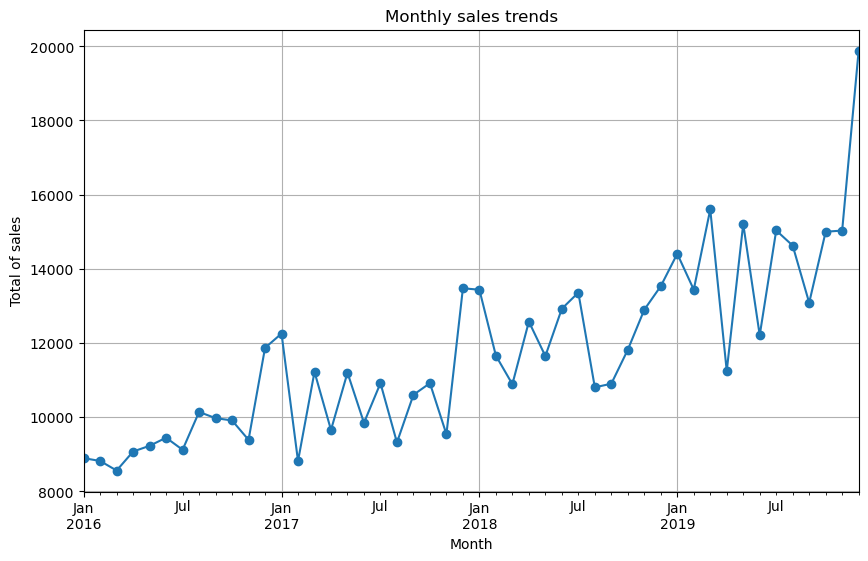

In [14]:
sales_of_month = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

plt.figure(figsize=(10, 6))
sales_of_month.plot(kind='line', marker='o')
plt.title('Monthly sales trends')
plt.xlabel('Month')
plt.ylabel('Total of sales')
plt.grid(True)
plt.show()

Висновок: бачимо тенденцію до росту в зимній новорічний період, та напрямок наших продажів (ріст). Прорахувати витрати якщо ми запустимо тимчасові акції на періоди нашого падіння а саме на квітень, червень, вересень.

Conclusion: we see an upward trend in the winter New Year period, and the direction of our sales (growth). Calculate the costs if we launch temporary promotions for the periods of our fall, namely for April, June, September.

# 4. Скільки мали транзакцій за рік?<br>
How many transactions did you have per year?

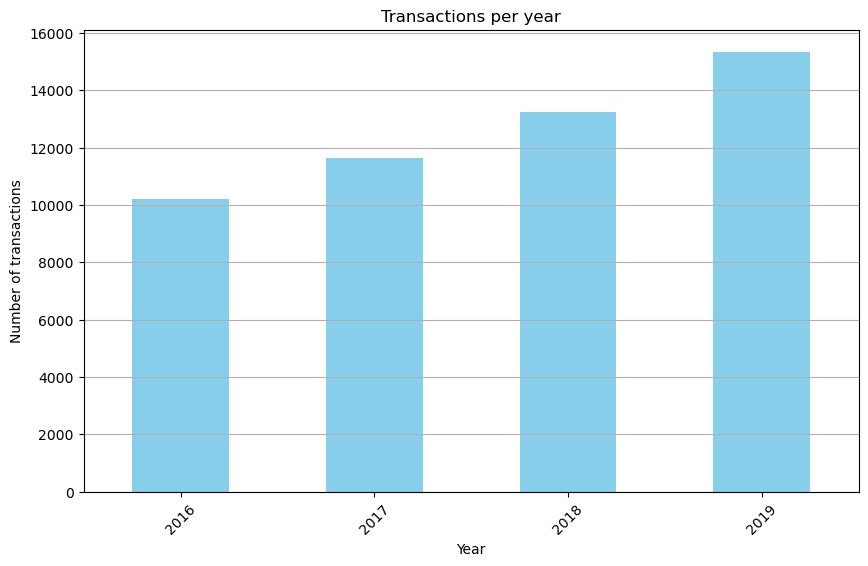

In [6]:
transactions_per_year = df.groupby(df['Date'].dt.to_period('Y')).size()

plt.figure(figsize=(10, 6))
transactions_per_year.plot(kind='bar', color='skyblue')
plt.title('Transactions per year')
plt.xlabel('Year')
plt.ylabel('Number of transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [7]:
transactions_difference = transactions_per_year.diff()
print(transactions_difference)

Date
2016       NaN
2017    1418.0
2018    1587.0
2019    2115.0
Freq: A-DEC, dtype: float64


Висновок: збільшення транзакцій з кожним роком. Після візуалізації бачимо різницю між роками в транзакціях.<br>
Conclusion: increasing transactions every year. After visualization, we can see the difference between years in transactions.

# 5. Яка вікова категорія більше купує?<br>
Which age group buys more?

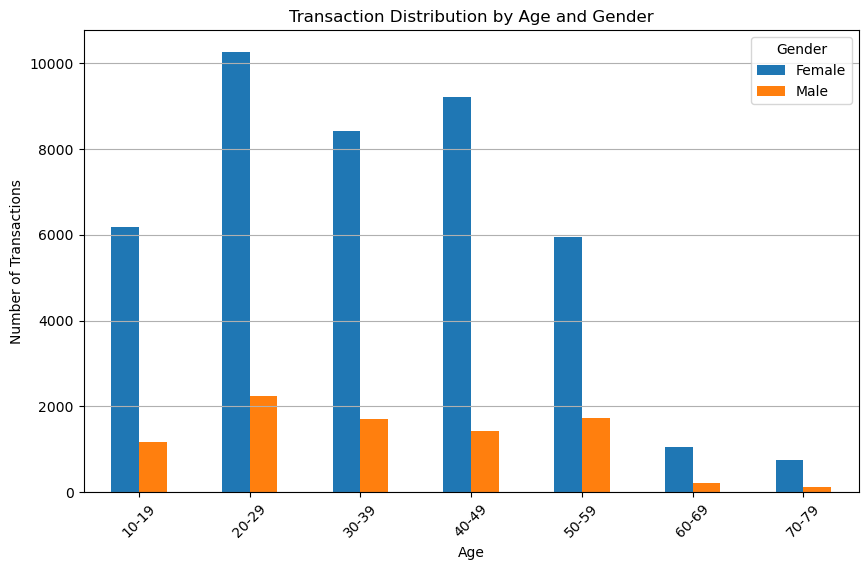

In [11]:
df['Age_Group'] = pd.cut(df['Age'], bins=range(10, 81, 10), right=False, labels=[f'{i}-{i+9}' for i in range(10, 80, 10)])
transactions_by_demographic = df.groupby(["Age_Group", "Gender"]).size().unstack()

transactions_by_demographic.plot(kind = "bar", figsize =(10, 6))
plt.title('Transaction Distribution by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Gender')
plt.show()

Висновок: найкращий віковий діапазон це з 20-49 років. Можна їх залучати до купілві через налаштовану рекламу<br>
Conclusion: the best age range is from 20-49 years

# 6. Про всяк випадок перевіримо на дублікат поки ми тільки почали<br>
Just in case, let's check for a duplicate while we're just getting started

In [3]:
df.duplicated().sum()

1

Знайшли дуплікат, добре що один. Тому сильно не впливає на попередні графіки. Видаляємо та продовжуємо.<br>
Found a duplicate, good thing there's one. Therefore, it does not greatly affect the previous graphs. Delete and continue.

In [4]:
 df[df.duplicated(keep=False)]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [5]:
df_new = df.drop(index = 32664)

In [6]:
df_new.duplicated().sum()

0

# 7. Яка категорія продуктів найбільш популярна? (рахуємо по її продажу)<br>
Which product category is the most popular? (calculated by its sales)

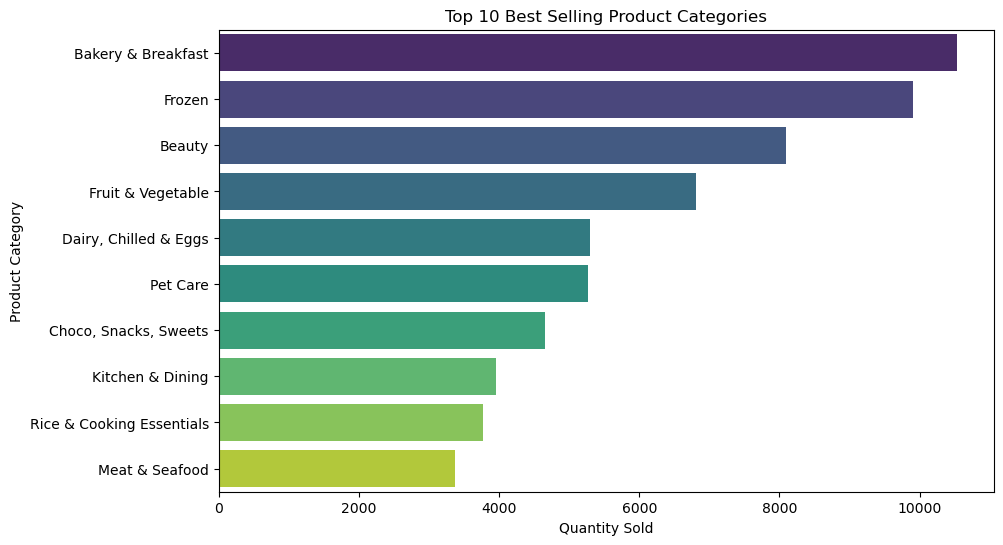

In [22]:
top_selling_categories = df_new.groupby('Category')['QTY'].sum().sort_values(ascending=False).head(10)

average_price_per_category = df_new.groupby('Category')['Price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_categories.values, y=top_selling_categories.index, palette='viridis')
plt.title('Top 10 Best Selling Product Categories')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Category')
plt.show()

Висновок: лідери хлібобулочні вироби та сніданки, заморожені продукти і засоби для догляду.<br>
Маємо два варіанти або робити зусилля на збільшення ще до того гарних продажів з існуючих топ 3 категорій. Або розвивати наші слабкі ланки як мясо та рибо продукти, крупи та приправи. Оскільки вони є ваговими для існування людини (Білки та корисні вуглеводи)

Conclusion: the leaders are bakery and breakfast products, frozen products and care products.<br>
We have two options, either to make efforts to increase the already good sales from the existing top 3 categories. Or develop our weak links such as meat and fish products, cereals and seasonings. Because they are important for human existence (Proteins and useful carbohydrates)

# 8. Скільки наших клієнтів у кожному місті?<br>
How many of our customers are in each city?

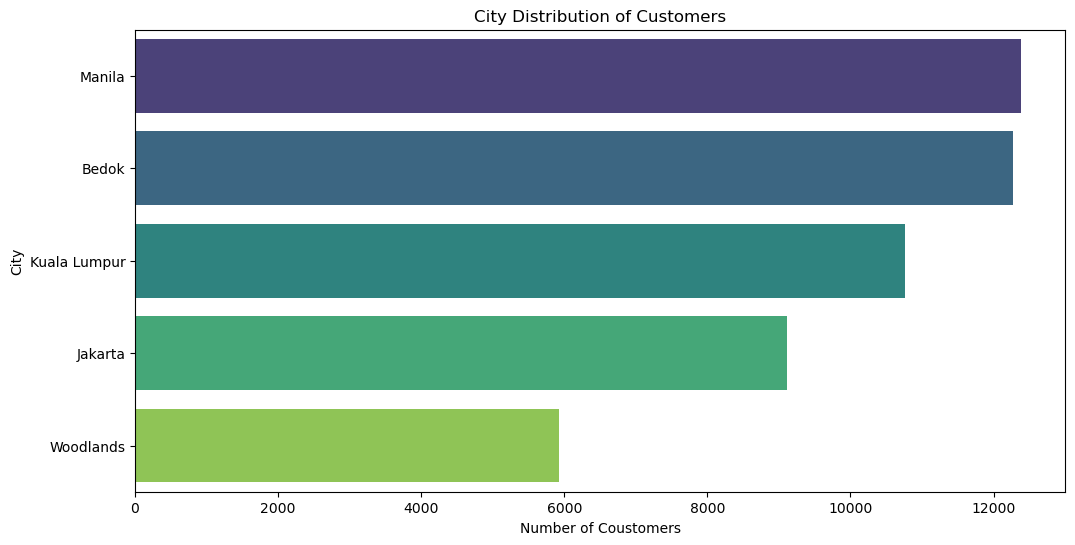

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(y = "City", data = df_new, palette='viridis', order = df["City"].value_counts().index)
plt.title('City Distribution of Customers')
plt.xlabel("Number of Coustomers")
plt.ylabel("City")
plt.show()

Висновок: розподіл наших клієнтів по містах<br>
Distribution of our clients by city

# 9. Давайте дізнаємось до якої країни вони належать<br>
Let's find out which country they belong to

In [42]:
country_city_counts = df_new.groupby(['Country', 'City']).size().reset_index(name='Count')
country_city_counts = country_city_counts.sort_values(by='Count', ascending=False)
print(country_city_counts)

       Country          City  Count
2  Philippines        Manila  12380
3    Singapore         Bedok  12271
1     Malaysia  Kuala Lumpur  10763
0    Indonesia       Jakarta   9108
4    Singapore     Woodlands   5924


Висновок: маємо дві торгові точки в Сінгапурі, троїхи дивує оскільки це країна з найменшим населенням серед країн (5,454 мільйона)
і було б більш ефективно оцінити наші можливості на країну як Індонезія (273,8 мільйона) інформація у вільному доступі Wikipedia. 

Conclusion: we have two outlets in Singapore, which is somewhat surprising since it is the country with the smallest population among countries (5.454 million)
and it would be more effective to evaluate our capabilities on a country like Indonesia (273.8 million) information in the freely accessible Wikipedia.

 # 10. Який загальний вид наишх клієнтів в межах країн?<br>
What is the general type of our customers within countries

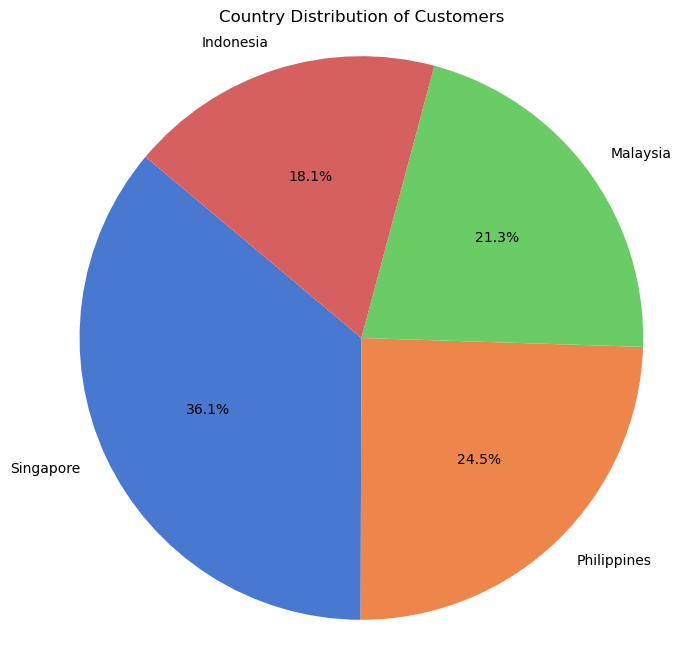

Singapore      18195
Philippines    12380
Malaysia       10763
Indonesia       9108
Name: Country, dtype: int64


In [18]:
plt.figure(figsize=(8, 8))
country_counts = df_new['Country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=140)
plt.title('Country Distribution of Customers')
plt.axis('equal')
plt.show()
print(country_counts)

Висновок: бачимо з візуалізації, що так само більше клаєнтів з Сінгапуру пропоную продовжити дивитися різницю між німи<br>
Conclusion: we can see from the visualization that there are also more clients from Singapore, I suggest you continue to see the difference between them<br>

# 11. Перевіримо чи збігаються дані з сумою наших  рахунків з податками та без. <br>
Let's check whether the data matches the amount of our accounts with and without taxes.

In [56]:
country_amount_counts = df_new.groupby("Country")["Net Bill Amount"].sum().reset_index(name='Count').round(2)
country_amount_counts= country_amount_counts.sort_values(by='Count', ascending=False)
display(country_amount_counts)

country_amount_counts = df_new.groupby("Country")["Gross Bill Amount"].sum().reset_index(name='Count').round(2)
country_amount_counts= country_amount_counts.sort_values(by='Count', ascending=False)
display(country_amount_counts)

,Country,Count
3,Singapore,1220582.38
2,Philippines,799828.32
1,Malaysia,727760.01
0,Indonesia,616394.79


,Country,Count
3,Singapore,1306023.15
2,Philippines,895807.72
1,Malaysia,771425.61
0,Indonesia,678034.27


Висновок: перша табличка це з урахуванням податків (чистими) наступна без урахування.<br>
Але данні не сходяться оскільки якщо відкриємо податок GST він дорівнює тільки 0,1.<br>
Наприклад: візьмемо Сінгапур 1,306,023.15× (0.1/100)=1306.02315 (що є податком від суми)<br>
1,306,023.15−1306.02315=1,304,717.12685 означає що це буде net bill amount але у нас значення не коректне

Conclusion: the first table includes taxes (net), the next one without.<br>
But the data do not match because if we open the GST tax, it is only 0.1.<br>
For example: let's take Singapore 1,306,023.15× (0.1/100)=1306.02315 (which is the tax on the amount)<br>
1,306,023.15−1306.02315=1,304,717.12685 means that it will be the net bill amount, but our value is incorrect

# 12. Які наші витрати в різних країнах, на прдукцію та операційні внески ?<br>
What are our costs in different countries, for production and operating costs

In [50]:
df_new["Total Cost"] = df_new["Operating Cost"] + df_new["Product Cost"]
total_cost_by_country = df_new.groupby("Country")["Total Cost"].sum().reset_index(name="Total Cost").round(2)
total_cost_by_country = total_cost_by_country.sort_values(by="Total Cost", ascending=False)
print(total_cost_by_country)

       Country  Total Cost
3    Singapore   189362.24
2  Philippines   123638.15
1     Malaysia   111990.63
0    Indonesia    95147.07


Висновок: незначні витрати порівняно з прибутком<br>
Conclusion: insignificant costsand compared to profit

# 13. Який зв’язок між ціною продуктів і сумою чистого рахунку? 
What is the relationship between the price of the products and the amount of the net bill.

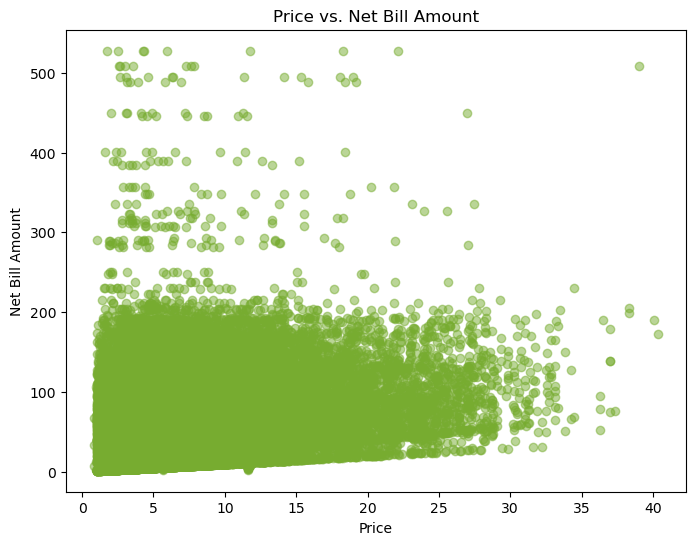

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df_new['Price'], df_new['Net Bill Amount'], c="#77AC30", alpha=0.5)
plt.title('Price vs. Net Bill Amount')
plt.xlabel('Price')
plt.ylabel('Net Bill Amount')
plt.show()

Висновок: це може означати, що більшість продуктів є відносно недорогими, що призводить до низької суми рахунку. Оскільки більшість рахунків з чеком до 200<br>
Conclusion: This may mean that most products are relatively inexpensive, resulting in a low bill. Since most accounts with a check up to $200

# 14. Як кількість придбаних продуктів змінюється залежно від їх ціни?
How the quantity of products purchased varies depending on their price.

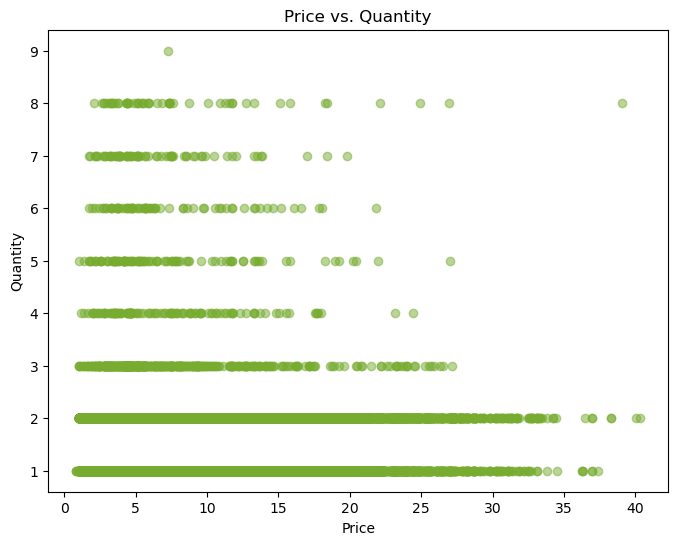

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df_new['Price'], df_new['QTY'],c="#77AC30", alpha=0.5)
plt.title('Price vs. Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

Висновок: бачимо що більшість клієнтів беруть до 3 товарів. Також цікаво, що маючи більше продуктів не у всіх середня чи висока ціна тому можливо це досяглось за допомогою акцій або нізької собі вартості

Conclusion: we see that most customers take up to 3 products. It is also interesting that, having more products, not all of them have an average or high price, so maybe this was achieved with the help of promotions or a low price

# 15. Переглянемо коректність наших даних в карті лояльності
Let's review the correctness of our data in the loyalty card

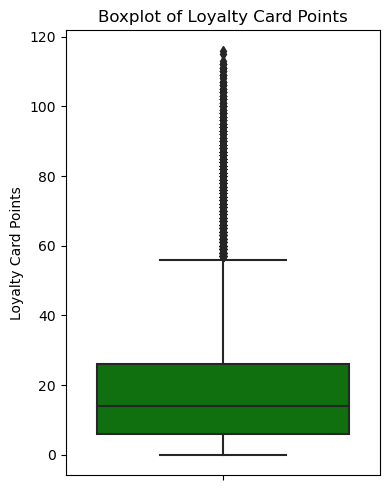

In [11]:
plt.subplots(figsize=(4, 5))
sns.boxplot( y='Loyalty Card Points', color="green", data=df_new)
plt.title('Boxplot of Loyalty Card Points')
plt.tight_layout()
plt.show()

Висновок: бачимо багато даних за межами верхнього максимума, можливо це клієнти з великою кількістю балів лояльності: що деякі клієнти накопичили надзвичайно велику кількість балів лояльності порівняно з рештою клієнтів.<br>
Помилки збору даних або аномалія<br>
Можливо програми винагород які мають надзвичайно високу кількість балів. 

Conclusion: We see a lot of data outside the upper maximum, possibly customers with a large number of loyalty points: that some customers have accumulated an unusually high number of loyalty points compared to the rest of the customers.<br>
Data collection errors or anomaly<br>
Maybe rewards programs that have an extremely high number of points.

# 16. Розглянемо наш прибуток  у % від маржі?
Consider our profit in % of margin?

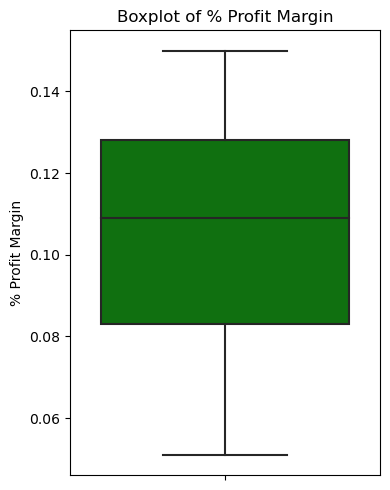

In [12]:
plt.subplots(figsize=(4, 5))
sns.boxplot(y='% Profit Margin', color= "green", data=df_new)
plt.title('Boxplot of % Profit Margin')
plt.tight_layout()
plt.show()

Висновок: бачимо що наша медіана више середнього, та верхній та нижній квартиль вище очікуваного. Гарна ознака.<br>
Conclusion: we see that our median is higher than the average, and the upper and lower quartiles are higher than expected. A good sign.<br>

# 17. Якому виду оплати надають перевагу наші клієнти?
What type of payment do our customers prefer?

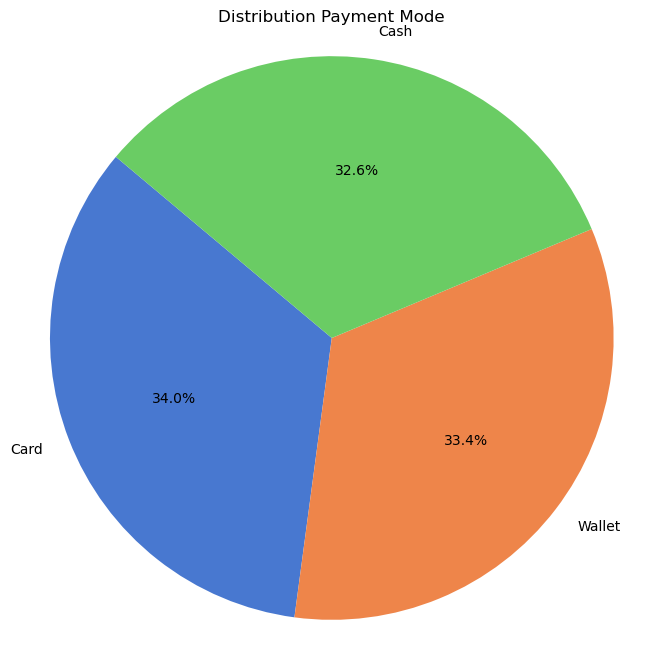

Card      17149
Wallet    16867
Cash      16430
Name: Payment Mode, dtype: int64


In [14]:
plt.figure(figsize=(8, 8))
payment_counts = df_new['Payment Mode'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=140)
plt.title('Distribution Payment Mode')
plt.axis('equal')
plt.show()
print(payment_counts)

In [9]:
payment_counts = df_new.groupby(["Country", "Payment Mode"])["Payment Mode"].count().reset_index(name="Count")
payment_counts["Count"] = payment_counts["Count"]
payment_counts_sorted = payment_counts.sort_values(by=["Country", "Count"], ascending=[True, False])
print(payment_counts_sorted)

        Country Payment Mode  Count
1     Indonesia         Cash   3211
2     Indonesia       Wallet   3026
0     Indonesia         Card   2871
3      Malaysia         Card   3872
5      Malaysia       Wallet   3764
4      Malaysia         Cash   3127
7   Philippines         Cash   4263
6   Philippines         Card   4186
8   Philippines       Wallet   3931
9     Singapore         Card   6220
11    Singapore       Wallet   6146
10    Singapore         Cash   5829


Висновок: бачимо достатньо рівні значення між методами оплати, можливо була б гарна ідея стимулювати оплату через -wallet оскільки менші податки. І робити в електронній формі оплату, за рахунок балів клієнтів і тд. До речі у Філіпінах достатньо гарні показники фактури не дивлячись що там так само тільки один центр (порівняно з іншими). 

Conclusion: we see fairly equal values ​​between payment methods, maybe it would be a good idea to encourage payment via -wallet because of lower taxes. And make payment in electronic form, at the expense of customer points, etc. By the way, the invoice indicators are quite good in the Philippines, despite the fact that there is also only one center there (compared to others)

In [14]:
cash_payment_customers = df_new[df_new["Payment Mode"] == "Card"]["Age"]
credit_card_customers = df_new[df_new["Payment Mode"] == "Wallet"]["Age"]

z_statistic, p_value = stats.ttest_ind(cash_payment_customers, credit_card_customers)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Існує значна різниця в середньому віці між двома групами. There is a significant difference in the mean age between the two groups.")
else:
    print("Значної різниці в середньому віці між двома групами немає. There is no significant difference in the mean age between the two groups.")

Z-statistic: -8.458618024706986
P-value: 2.812173638186422e-17
Існує значна різниця в середньому віці між двома групами. There is a significant difference in the mean age between the two groups.


Зберігаємо наше форматування для візуалізації.<br>
We save our formatting for rendering

In [7]:
df_new.to_csv("International_Grocery_Store_Analytics.xlsx", index=False)